In [102]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
np.random.seed(101)
tf.set_random_seed(101)

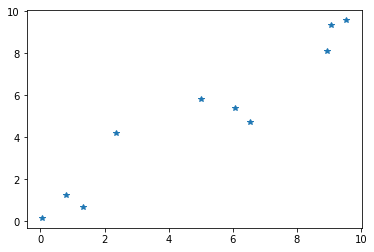

In [104]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data
n_samples = len(x_data)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
plt.plot(x_data,y_label,'*')

## Network Example

y = Wx + b


In [117]:
epochs = 100

### Define the graph

In [113]:
tValue = np.random.rand(2)
W = tf.Variable(tValue[0])
b = tf.Variable(tValue[1])
#Cost Function
error = tf.reduce_sum(tf.square(y_label - (W*x_data+b)))/(2*n_samples) # sum of the squares
#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [114]:
#Initialize Variables
init = tf.global_variables_initializer()

In [115]:
#saving the model
saver = tf.train.Saver()

### Create Session and Run!

In [116]:
with tf.Session() as sess:
    
    sess.run(init)

    for i in range(epochs):
        
        sess.run(train)
        final_W , final_b, final_error= sess.run([W,b,error])
        #print (final_W, final_b, final_error)
    # Fetch Back Results
    
    print (final_W, final_b,final_error )
    
    saver.save(sess,'new_models/my_second_model.ckpt')

0.9239041351396037 0.298399941018583 0.41607193177813384


### Evaluate Results

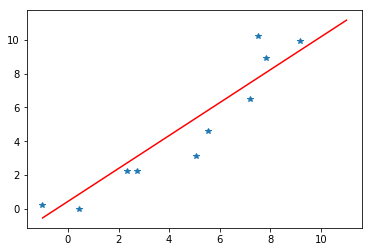

In [96]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_W*x_test + final_b

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

# Loading a Model

In [98]:
with tf.Session() as sess:
    
    # Restore the model
    saver.restore(sess,'new_models/my_second_model.ckpt')
    

    # Fetch Back Results
    restored_W , restored_b = sess.run([W,b])

INFO:tensorflow:Restoring parameters from new_models/my_second_model.ckpt


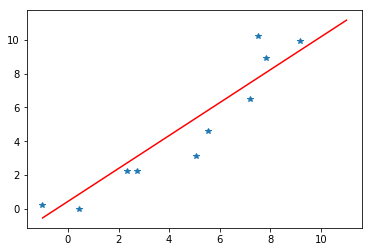

In [99]:
x_test = np.linspace(-1,11,10)
y_pred_plot = restored_W*x_test + restored_b

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')